In [1]:
import pandas as pd
import os 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
!pwd
os.chdir('../')
!pwd

/home/yukikongju/Projects/tidytuesday/bixi/notebooks
/home/yukikongju/Projects/tidytuesday/bixi


In [8]:
# plot daily usage across the years for station
station_code = '6182'
usage_dir = 'data/monthly_usage/'

# get monthly usage files for station
station_files = []
dfs = []
for subdir, dirs, files in os.walk(usage_dir):
    for file in files:
        if station_code in file: 
            csv_path = os.path.join(subdir, file)
            station_files.append(csv_path)
            df = pd.read_csv(csv_path)
            dfs.append(df)

# concat files
df_concat = pd.concat(dfs)

In [9]:
df_concat

,date,start_station_code,total_count,member_count,non_member_count
0,2022-09-01,6182.0,76,NaN,NaN
1,2022-09-02,6182.0,83,NaN,NaN
2,2022-09-03,6182.0,52,NaN,NaN
3,2022-09-04,6182.0,49,NaN,NaN
4,2022-09-05,6182.0,41,NaN,NaN
...,...,...,...,...,...
25,2015-06-26,6182.0,76,53.0,23.0
26,2015-06-27,6182.0,53,41.0,12.0
27,2015-06-28,6182.0,22,12.0,10.0
28,2015-06-29,6182.0,49,38.0,11.0


In [15]:
df_concat['date'] = pd.to_datetime(df_concat['date'])

# weekly aggregation
df_week = df_concat.groupby([
    pd.Grouper(key='date', freq='W'), 
    pd.Grouper('start_station_code')
]).agg(['sum']).droplevel(axis=1, level=1).reset_index()


# monthly aggregation
df_month = df_concat.groupby([
    pd.Grouper(key='date', freq='M'), 
    pd.Grouper('start_station_code')
]).agg(['sum']).droplevel(axis=1, level=1).reset_index()


In [16]:
df_month

,date,start_station_code,total_count,member_count,non_member_count
0,2014-04-30,6182.0,331,307.0,24.0
1,2014-05-31,6182.0,1105,999.0,106.0
2,2014-06-30,6182.0,1404,1190.0,214.0
3,2014-07-31,6182.0,1379,1194.0,185.0
4,2014-08-31,6182.0,1327,1091.0,236.0
...,...,...,...,...,...
58,2022-07-31,6182.0,1694,1442.0,252.0
59,2022-08-31,6182.0,1698,1413.0,285.0
60,2022-09-30,6182.0,1461,0.0,0.0
61,2022-10-31,6182.0,2280,0.0,0.0


Text(0.5, 1.0, 'Monthly Usage - Station 6182')

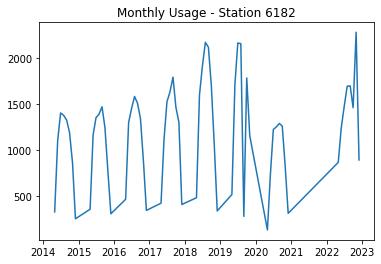

In [18]:
plt.plot(df_month['date'], df_month['total_count'])
plt.title(f'Monthly Usage - Station {station_code}')

In [ ]:
## projection for the next 5 years